
Mining Social and Geographic Datasets
-----------------------------------

Lab Class 5: OSMnx (Geoff Boeing)
-------------------------------

https://geoffboeing.com/2016/11/osmnx-python-street-networks/

OSMnx (Boeing 2017) is a Python package for downloading administrative boundary shapes and street networks from OpenStreetMap. It allows you to easily construct, project, visualize, and analyze complex street networks in Python with NetworkX. You can get a city’s or neighborhood’s walking, driving, or biking network with a single line of Python code. Then you can simply visualize cul-de-sacs or one-way streets, plot shortest-path routes, or calculate stats like intersection density, average node connectivity, or betweenness centrality. You can download/cite the paper here.

Boeing, G. 2017. “OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks.” Computers, Environment and Urban Systems. 65, 126-139. 


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colors as colors
#from IPython.display import IFrame
#ox.config(log_console=True, use_cache=True)
ox.__version__

'0.9'

In [6]:
G=ox.graph_from_place('Cambridge,UK',network_type='drive')

### Get graph based on address

In [7]:
#G=ox.graph_from_address('Cambridge,UK',distance=1000,network_type='drive')
#Lon=ox.project_graph(Lon)

### calculate shortest path

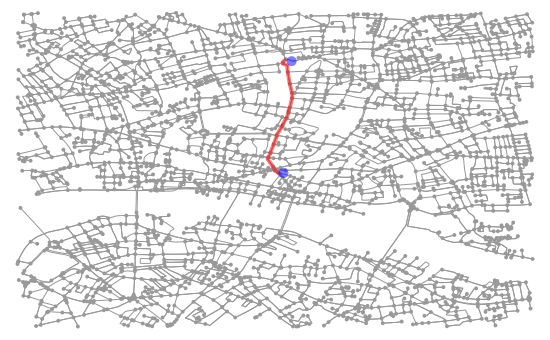

In [86]:
# define origin/desination points then get the nodes nearest to each
origin_point = (51.508056, -0.128056) # Trafalgar Square
destination_point = (51.515312, -0.142025) # Oxford Circus
origin_node = ox.get_nearest_node(G, origin_point)
destination_node = ox.get_nearest_node(G, destination_point)
origin_node, destination_node

# find the shortest path between origin and destination nodes
route = nx.shortest_path(G, origin_node, destination_node, weight='length')
str(route)

# plot the route showing origin/destination lat-long points in blue
fig, ax = ox.plot_graph_route(G, route, origin_point=origin_point, destination_point=destination_point)

### calculate centrality

In [8]:
# edge closeness centrality: convert graph to a line graph so edges become nodes and vice versa
edge_cc = nx.closeness_centrality(nx.line_graph(G))

In [9]:
# set edge attributes
nx.set_edge_attributes(G,edge_cc,'cc')

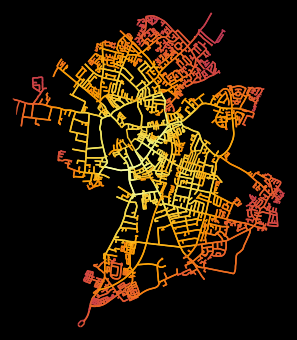

In [10]:
# list of edge values for the orginal graph
#ev = [edge_cc[edge + (0,)] for edge in G.edges()]

# list of edge values for the orginal graph
ev = list(nx.get_edge_attributes(G,'cc').values())

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, bgcolor='k', axis_off=True, node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

Lab Exercise 5: OSMnx (Geoff Boeing)
-------------------------------

### Github links for lab exercise

https://github.com/gboeing/osmnx-examples/blob/master/notebooks/06-example-osmnx-networkx.ipynb

https://github.com/gboeing/osmnx-examples/blob/master/notebooks/08-example-line-graph.ipynb

5a) get a street-network graph from bank station up to 2000m  <br />
----------------------------------------------------------

In [106]:
G=ox.graph_from_address('Bank,London,UK',distance=1000,network_type='drive')
#Lon=ox.project_graph(Lon)
WG=ox.graph_from_address('Bank,London,UK',distance=1000,network_type='walk')
#Lon=ox.project_graph(Lon)

5b) calculate for the graph closeness, betweenness and degree centrality <br />
----------------------------------------------------------

In [107]:
edge_cc = nx.closeness_centrality(nx.line_graph(G))

In [108]:
edge_bc = nx.betweenness_centrality(nx.line_graph(G))

In [109]:
edge_dc = nx.degree_centrality(nx.line_graph(G))

5c) visualise the three graphs separately and save the image as a png. <br />
----------------------------------------------------------

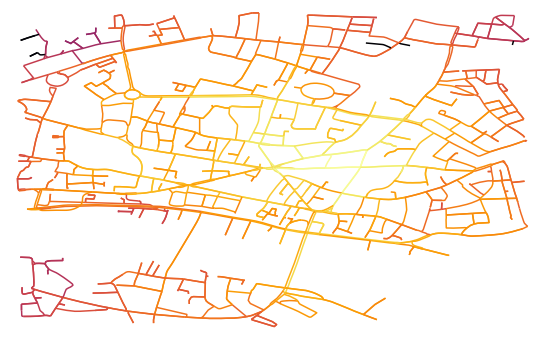

In [150]:
# list of edge values for the orginal graph
ev = [edge_cc[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, axis_off=True, node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1,save=True)

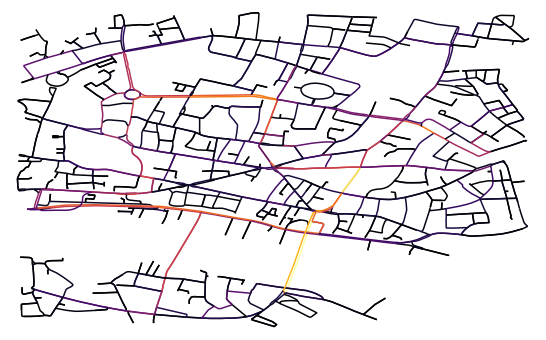

In [148]:
# list of edge values for the orginal graph
ev = [edge_bc[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, axis_off=True, node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1,save=True)

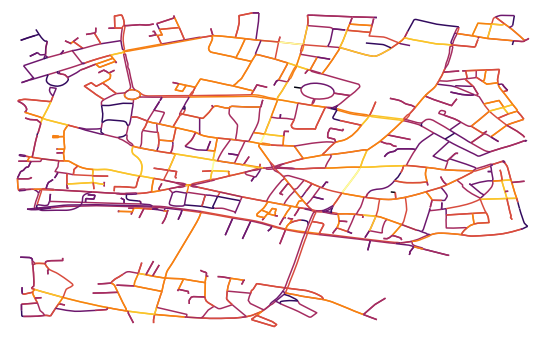

In [149]:
# list of edge values for the orginal graph
ev = [edge_dc[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, axis_off=True, node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1,save=True)

5d) calculate the shortest path from bank station to tate modern by walk  <br />
----------------------------------------------------------

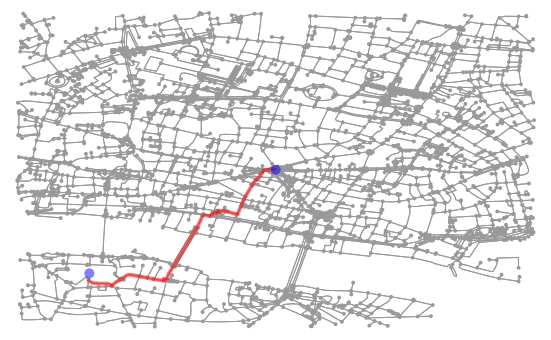

In [121]:
# define origin/desination points then get the nodes nearest to each
origin_point = ox.geocode('Bank Station,London,UK') #(51.513, -0.088) # bank station
destination_point = ox.geocode('Tate Modern,London,UK') #(51.5076, -0.0994) # tate modern
origin_node = ox.get_nearest_node(WG, origin_point)
destination_node = ox.get_nearest_node(WG, destination_point)
origin_node, destination_node

# find the shortest path between origin and destination nodes
route = nx.shortest_path(WG, origin_node, destination_node, weight='length')
str(route)

# plot the route showing origin/destination lat-long points in blue
fig, ax = ox.plot_graph_route(WG, route, origin_point=origin_point, destination_point=destination_point)

5e) calculate the shortest path from bank station to holborn station by car <br />
----------------------------------------------------------

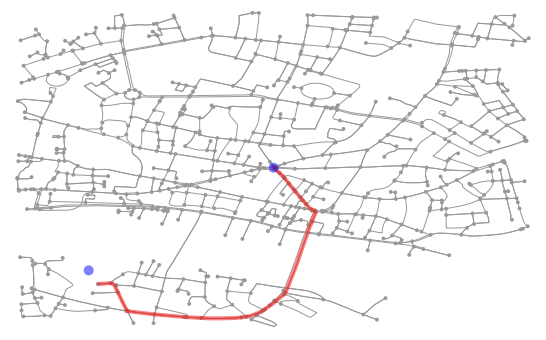

In [123]:
# define origin/desination points then get the nodes nearest to each
origin_point = ox.geocode('Bank Station,London,UK') #(51.513, -0.088) # bank station
destination_point = ox.geocode('Tate Modern,London,UK') #(51.5076, -0.0994) # tate modern
origin_node = ox.get_nearest_node(G, origin_point)
destination_node = ox.get_nearest_node(G, destination_point)
origin_node, destination_node

# find the shortest path between origin and destination nodes
route = nx.shortest_path(G, origin_node, destination_node, weight='length')
str(route)

# plot the route showing origin/destination lat-long points in blue
fig, ax = ox.plot_graph_route(G, route, origin_point=origin_point, destination_point=destination_point)

5f) calculate the difference in distance between the two <br />
----------------------------------------------------------
hint: nx.shortest_path_length()

In [124]:
drive_length = nx.shortest_path_length(G, origin_node, destination_node, weight='length')
walk_length = nx.shortest_path_length(WG, origin_node, destination_node, weight='length')
drive_length-walk_length

516.3439726858292